# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\vineet\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [6]:
# #Sampling down the data
project_data = project_data.sample(frac=0.5)

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
20423        83769  p042230  acec941f7caec9adb1b411fb333ccfde           Mrs.   
107944      121903  p022317  8c4dbcc1477e1d2ca1d17ca44e72eed1           Mrs.   

       school_state project_submitted_datetime project_grade_category  \
20423            TX        2016-06-23 21:20:59          Grades PreK-2   
107944           CA        2017-03-04 01:32:37          Grades PreK-2   

                                            project_title  \
20423   Flexible Seating for a Developmentally Appropr...   
107944                      Help Keep Our Books Organized   

                                          project_essay_1  \
20423   Each and every child is different and unique w...   
107944  My students love and enjoy coming to school ev...   

                                          project_essay_2 project_essay_3  \
20423   While it may look like I have a simple classro...             NaN   
107944  My students love to read. They are starting to...             NaN   

       project_essay_4                           project_resource_summary  \
20423              NaN  My students need flexible seating options to c...   
107944             NaN  My students need a library mobile storage cart...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
20423                                              0                    1   
107944                                            39                    1   

         price  quantity   clean_categories          clean_subcategories  \
20423    47.23        18    AppliedLearning             EarlyDevelopment   
107944  195.98         3  Literacy_Language  Literacy Literature_Writing   

                                                    essay  
20423   Each and every child is different and unique w...  
107944  My students love and enjoy coming to school ev...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)

Each and every child is different and unique when they walk in the door of my classroom. They look different. They act differently. They have different interests. Some come from homes where learning begins before they walk or speak. Some come from homes that do not own books, pencils, or crayons. Each one is special and completes our school family once they step into my classroom. \r\nMy job as their teacher is to create a classroom community where differences are embraced and children learn through play and positive interactions.While it may look like I have a simple classroom with 22 students, I actually have a small community of young minds waiting to find their niche. I am tasked with finding ways to successfully deliver curriculum and social skills into each of those 22 minds. In Kindergarten, we are wiggly- for lack of a better word. We need lots of opportunities to move and play throughout the day. I incorporate numerous transitions between lessons and fun \"brain breaks\" on to

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My school is considered a title one school with means we require more state funding due to the school communities income. In my classroom, you will find a very diverse group of students. You will see students with ADHD, ADD, autism, deaf and hard of hearing, gifted, English as a second language, students of average intelligence, etc... We are an extremely diverse school, and we do our absolute best to meet the needs of all our students. We love learning, but sometimes require a little extra help.Every child wants to walk into their classroom and feel comfortable and welcomed. When they are offered multiple forms of seating, they can do just that. The more \"homey\" our classroom is, the more they will relax and enjoy learning. This seating is also fabulous for students who cannot sit still in a \"regular\" chair or setting. Some students thrive when given the chance to bounce or move around a little. These different forms of seating will offer that variety for all students to encourage

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My school is considered a title one school with means we require more state funding due to the school communities income. In my classroom, you will find a very diverse group of students. You will see students with ADHD, ADD, autism, deaf and hard of hearing, gifted, English as a second language, students of average intelligence, etc... We are an extremely diverse school, and we do our absolute best to meet the needs of all our students. We love learning, but sometimes require a little extra help.Every child wants to walk into their classroom and feel comfortable and welcomed. When they are offered multiple forms of seating, they can do just that. The more  homey  our classroom is, the more they will relax and enjoy learning. This seating is also fabulous for students who cannot sit still in a  regular  chair or setting. Some students thrive when given the chance to bounce or move around a little. These different forms of seating will offer that variety for all students to encourage lea

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My school is considered a title one school with means we require more state funding due to the school communities income In my classroom you will find a very diverse group of students You will see students with ADHD ADD autism deaf and hard of hearing gifted English as a second language students of average intelligence etc We are an extremely diverse school and we do our absolute best to meet the needs of all our students We love learning but sometimes require a little extra help Every child wants to walk into their classroom and feel comfortable and welcomed When they are offered multiple forms of seating they can do just that The more homey our classroom is the more they will relax and enjoy learning This seating is also fabulous for students who cannot sit still in a regular chair or setting Some students thrive when given the chance to bounce or move around a little These different forms of seating will offer that variety for all students to encourage learning in a more comfortable

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 54624/54624 [00:51<00:00, 1050.59it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my school considered title one school means require state funding due school communities income in classroom find diverse group students you see students adhd add autism deaf hard hearing gifted english second language students average intelligence etc we extremely diverse school absolute best meet needs students we love learning sometimes require little extra help every child wants walk classroom feel comfortable welcomed when offered multiple forms seating the homey classroom relax enjoy learning this seating also fabulous students cannot sit still regular chair setting some students thrive given chance bounce move around little these different forms seating offer variety students encourage learning comfortable adequate manner i want students enjoy comfortable learning environment nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    
preprocessed_titles[1]

100%|█████████████████████████████████| 54624/54624 [00:02<00:00, 21238.26it/s]


'help keep books organized'

In [21]:
preprocessed_essays[20000]

project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [22]:
project_data['clean_titles'] = preprocessed_titles

## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# # we use count vectorizer to convert the values into one 
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
# categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [25]:
# # we use count vectorizer to convert the values into one 
# vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
# sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [26]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# # We are considering only the words which appeared in at least 10 documents(rows or projects).
# vectorizer = CountVectorizer(min_df=10)
# text_bow = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_bow.shape)

In [28]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [29]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# # text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# # make sure you have the glove_vectors file
# with open('glove_vectors', 'rb') as f:
#     model = pickle.load(f)
#     glove_words =  set(model.keys())

In [32]:
# # average Word2Vec
# # compute average word2vec for each review.
# avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors.append(vector)

# print(len(avg_w2v_vectors))
# print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# # S = ["abc def pqr", "def def def abc", "pqr pqr def"]
# tfidf_model = TfidfVectorizer()
# tfidf_model.fit(preprocessed_essays)
# # we are converting a dictionary with word as a key, and the idf as a value
# dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
# tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_vectors.append(vector)

# print(len(tfidf_w2v_vectors))
# print(len(tfidf_w2v_vectors[0]))

In [35]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [36]:
# price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
# # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# from sklearn.preprocessing import StandardScaler

# # price_standardized = standardScalar.fit(project_data['price'].values)
# # this will rise the error
# # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# # Reshape your data either using array.reshape(-1, 1)

# price_scalar = StandardScaler()
# price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# # Now standardize the data with above maen and variance.
# price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [38]:
# price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [39]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

In [40]:
# # merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [42]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [43]:
project_data[project_data.isnull().any(axis=1)]

Unnamed: 0       id                        teacher_id teacher_prefix  \
7820        17809  p180947  834f75f1b5e24bd10abe9c3dbf7ba12f            NaN   
57654      158692  p197901  e4be6aaaa887d4202df2b647fbfc82bb            NaN   

      school_state project_submitted_datetime project_grade_category  \
7820            CA        2016-11-04 00:15:45             Grades 3-5   
57654           PA        2016-06-03 10:15:05             Grades 3-5   

                                          project_title  \
7820   1:7 Increasing Tech to Decrease Achievement Gaps   
57654                                   Document Camera   

                                project_resource_summary  \
7820   My students need a classroom laptop that is ju...   
57654  My students need a Smart Document Camera to en...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
7820                                              1                    1   
57654                                             0                    1   

        price  quantity                clean_categories  \
7820   910.87         2  Literacy_Language Math_Science   
57654  145.29         2  Literacy_Language Math_Science   

                  clean_subcategories  \
7820   Literature_Writing Mathematics   
57654            Literacy Mathematics   

                                                   essay  \
7820   The children at Anna Yates Elementary school a...   
57654  Students at Robertsdale Elementary live in a l...   

                                            clean_essays  \
7820   the children anna yates elementary school expr...   
57654  students robertsdale elementary live low socio...   

                                        clean_titles  
7820   1 7 increasing tech decrease achievement gaps  
57654                                document camera

In [44]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')

In [45]:
# project_data[project_data['id']=='p197901']

In [46]:
y = project_data['project_is_approved'].values
# project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

In [47]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [48]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(24520, 18) (24520,)
(12078, 18) (12078,)
(18026, 18) (18026,)


In [49]:
# code for response coding with Laplace smoothing.
# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
   
    
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        
        vec = []
        for k in range(1,3):
            
            cls_cnt = X_train.loc[(X_train['project_is_approved']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*3)/ (denominator + 20*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [50]:
#Response coding for School State
alpha = 1
# train gene feature
train_school_state_feature_responseCoding = np.array(get_gv_feature(alpha, "school_state", X_train))
print("train_school_state_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_school_state_feature_responseCoding.shape)
# test gene feature
test_school_state_feature_responseCoding = np.array(get_gv_feature(alpha, "school_state", X_test))
# cross validation gene feature
cv_school_state_feature_responseCoding = np.array(get_gv_feature(alpha, "school_state", X_cv))

train_school_state_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (24520, 2)


In [51]:
#Response coding for  project grade category
alpha = 1
# train gene feature
train_project_grade_category_feature_responseCoding = np.array(get_gv_feature(alpha, "project_grade_category", X_train))
print("train_project_grade_category_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature:", train_project_grade_category_feature_responseCoding.shape)
# test gene feature
test_project_grade_category_feature_responseCoding = np.array(get_gv_feature(alpha, "project_grade_category", X_test))
# cross validation gene feature
cv_project_grade_category_feature_feature_responseCoding = np.array(get_gv_feature(alpha, "project_grade_category",X_cv ))

train_project_grade_category_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature: (24520, 2)


In [52]:
#Response coding for  teacher prefix
alpha = 1
# train gene feature
train_teacher_prefix_feature_responseCoding = np.array(get_gv_feature(alpha, "teacher_prefix", X_train))
print("train_teacher_prefix_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature:", train_teacher_prefix_feature_responseCoding.shape)
# test gene feature
test_teacher_prefix_feature_responseCoding = np.array(get_gv_feature(alpha, "teacher_prefix", X_test))
# cross validation gene feature
cv_teacher_prefix_feature_responseCoding = np.array(get_gv_feature(alpha, "teacher_prefix",X_cv ))

train_teacher_prefix_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature: (24520, 2)


In [53]:
# unique_variations = X_train['clean_categories'].value_counts()
# print(unique_variations.head())

In [54]:
#Response coding for  teacher prefix
alpha = 1
# train gene feature
train_clean_categories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_categories", X_train))
print("train_clean_categories_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature:", train_clean_categories_feature_responseCoding.shape)
# test gene feature
test_clean_categories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_categories", X_test))
# cross validation gene feature
cv_clean_categories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_categories",X_cv ))

train_clean_categories_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature: (24520, 2)


In [55]:
#Response coding for  teacher prefix
alpha = 1
# train gene feature
train_clean_subcategories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_subcategories", X_train))
print("train_clean_subcategories_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature:", train_clean_subcategories_feature_responseCoding.shape)
# test gene feature
test_clean_subcategories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_subcategories", X_test))
# cross validation gene feature
cv_clean_subcategories_feature_responseCoding = np.array(get_gv_feature(alpha, "clean_subcategories",X_cv ))

train_clean_subcategories_feature_responseCoding is converted feature using respone coding method. The shape of projrct category feature: (24520, 2)


In [56]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [57]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#Normalising the numerical features: teacher_number_of_previously _posted_projects
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = standard_vec.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = standard_vec.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = standard_vec.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [58]:
#Normalising the numerical feature
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = standard_vec.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [59]:
#Normalising numerical features: "quantity
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['quantity'].values.reshape(-1,1))

X_train_qty_std = standard_vec.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_qty_std = standard_vec.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_std = standard_vec.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, y_cv.shape)
print(X_test_qty_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [245]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 70420) (24520,)
(12078, 70420) (12078,)
(18026, 70420) (18026,)


In [246]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1761) (24520,)
(12078, 1761) (12078,)
(18026, 1761) (18026,)


In [247]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 5000) (24520,)
(12078, 5000) (12078,)
(18026, 5000) (18026,)


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [248]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_summary_bow,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 77194) (24520,)
(12078, 77194) (12078,)
(18026, 77194) (18026,)


In [64]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [153]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

RFC = RandomForestClassifier(class_weight="balanced")
tuned_parameters = {'n_estimators': base_learners,'max_depth':depth}
clf = GridSearchCV(RFC, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)


print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Wall time: 10min 18s


In [258]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,4,6,8,10]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [259]:
# def auc_scorer(target_score, prediction):
#     auc_value = roc_auc_score(prediction, target_score)    
#     return auc_value

# scorer = make_scorer(auc_scorer, greater_is_better=True)

In [260]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [114]:
# train_auc= grid_obj.cv_results_['mean_train_score']
# train_auc_std= grid_obj.cv_results_['std_train_score']
# cv_auc = grid_obj.cv_results_['mean_test_score'] 
# cv_auc_std= grid_obj.cv_results_['std_test_score']

In [261]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

In [262]:
print(scores.shape)

(5, 5)


Text(0.5, 26.5, 'max_depth')

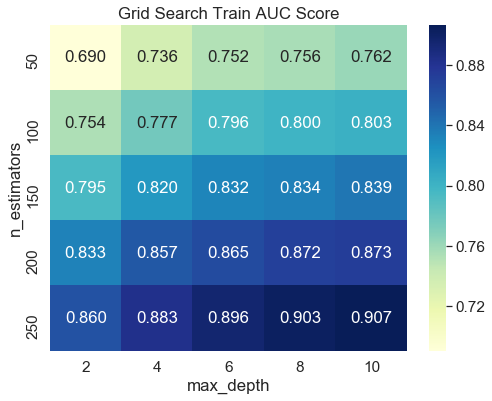

In [263]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(depth)), depth)
heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [264]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

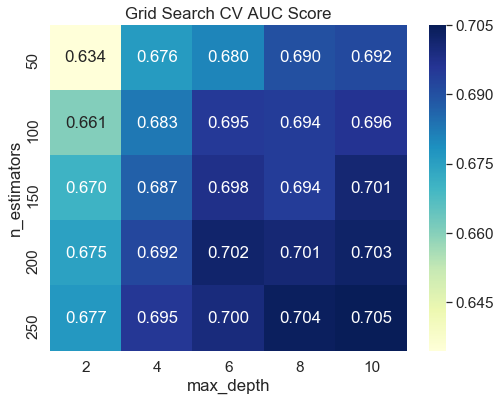

In [265]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC Score')
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(depth)), depth)
heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

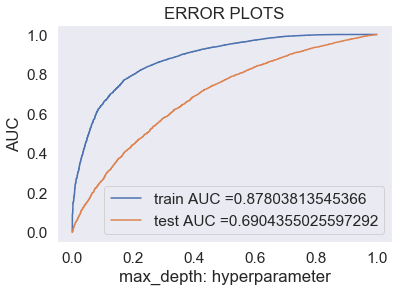

In [266]:
# print(train_auc.shape)
# %%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

rfc = RandomForestClassifier(n_estimators=250,max_depth=10,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
rfc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rfc, X_tr)    
y_test_pred = batch_predict(rfc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [267]:
print(test_fpr.shape)

(4435,)


In [268]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [269]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998225063258 for threshold 0.835
[[ 1876  1877]
 [ 1116 19651]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499998685345972 for threshold 0.845
[[ 1380  1378]
 [ 3530 11738]]


the maximum value of tpr*(1-fpr) 0.24999998225063258 for threshold 0.835


Text(0.5, 1.0, 'Confusion Matrix\n')

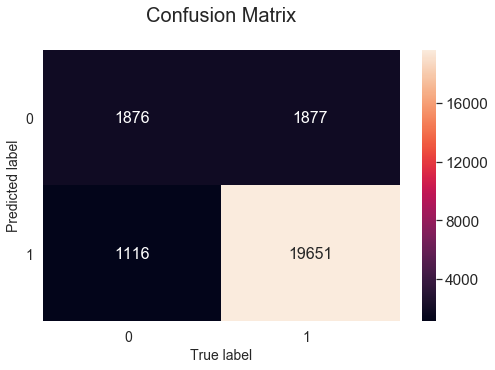

In [270]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.2499998685345972 for threshold 0.845


Text(0.5, 1.0, 'Confusion Matrix\n')

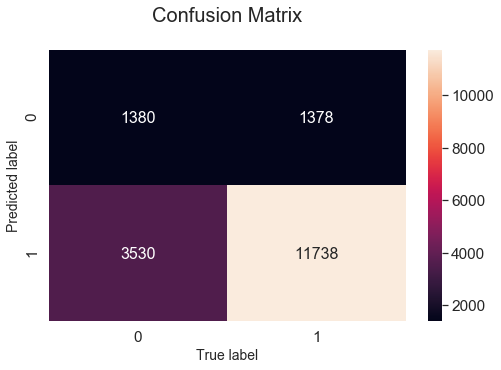

In [271]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [ ]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j)
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [293]:
print(z1)
print(z2)

[0.6755413474082991, 0.7173779012050453, 0.7365261566106281, 0.7384982020238945, 0.7527052395310869, 0.7061827477841924, 0.7529999235358164, 0.7730047614059639, 0.7887181967203636, 0.7852759997626901, 0.7582803405635566, 0.7965345499611403, 0.806615484018022, 0.8306356225900825, 0.8288747196334969, 0.7858603478568229, 0.8330959345274906, 0.8427316782726761, 0.8577172453975775, 0.8691875045022975, 0.8262511074415018, 0.8643321655703763, 0.8749805909629231, 0.8863714624832494, 0.8935695001872801]
[0.6397175637661313, 0.6719357948998659, 0.6775485612325436, 0.6658643759655147, 0.67905530622295, 0.6442889716178437, 0.6744878254802397, 0.6786533557748741, 0.6801113732931532, 0.6878778938938515, 0.6598227356000381, 0.6837601755490001, 0.6793738357205981, 0.686801528729573, 0.6875027224743389, 0.6580199636874927, 0.6783663515663624, 0.6888481909760336, 0.6889135062674732, 0.6922163976797773, 0.6541032145435061, 0.6767024017524061, 0.6920910795357627, 0.68753845193845, 0.6964813585195135]


In [165]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

In [296]:
x1 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]
# z1 = [0.933,0.958,0.956,0.973,0.974,0.993,0.998,0.996,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,]

x2 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,]
# z2 = [0.673,0.682,0.681,0.691,0.692,0.651,0.682,0.667,0.685,0.695,0.642,0.67,0.672,0.681,0.687,0.64,0.659,0.67,0.670,0.677]

In [297]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [273]:
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(24520, 54681)
(12078, 54681)
(18026, 54681)


In [274]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (24520, 1761)
CV shape: (12078, 1761)
Test shape: (18026, 1761)


In [275]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_summary_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_summary_tfidf = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_summary_tfidf = vectorizer.transform(X_test['project_resource_summary'].values)
print("Train shape:",X_train_project_summary_tfidf.shape)
print("CV shape:",X_cv_project_summary_tfidf.shape)
print("Test shape:",X_test_project_summary_tfidf.shape)

Train shape: (24520, 1761)
CV shape: (12078, 1761)
Test shape: (18026, 1761)


In [276]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_project_summary_tfidf,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_project_summary_tfidf,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_project_summary_tfidf,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 58216) (24520,)
(12078, 58216) (12078,)
(18026, 58216) (18026,)


In [172]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

RFC = RandomForestClassifier()
tuned_parameters = {'n_estimators': base_learners,'max_depth':depth}
clf = GridSearchCV(RFC, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Wall time: 9min 32s


In [278]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,4,6,8,10]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [279]:
# def auc_scorer(target_score, prediction):
#     auc_value = roc_auc_score(prediction, target_score)    
#     return auc_value

# scorer = make_scorer(auc_scorer, greater_is_better=True)

In [280]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [281]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

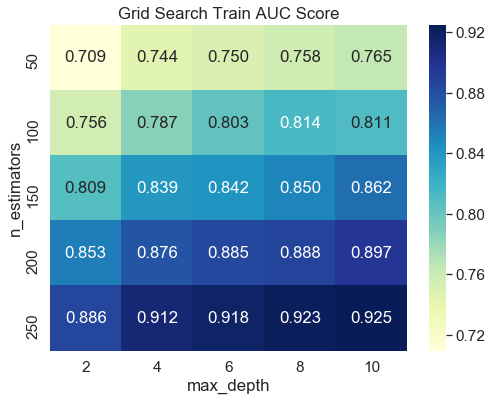

In [282]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')
# plt.ylabel('Predicted label')
# plt.xlabel('True label')
heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [283]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

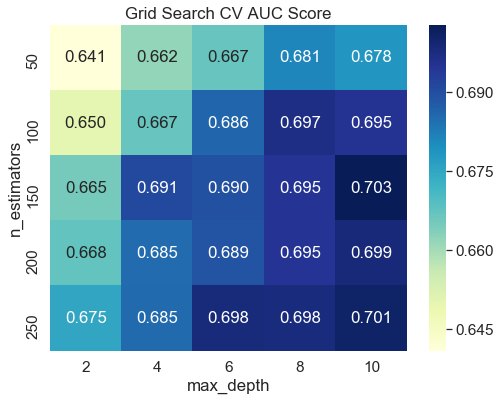

In [284]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

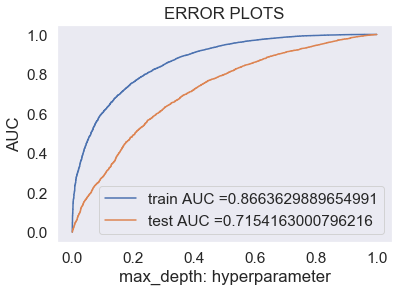

In [285]:
# print(train_auc.shape)
# %%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

rfc = RandomForestClassifier(n_estimators=250,max_depth=8,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
rfc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rfc, X_tr)    
y_test_pred = batch_predict(rfc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.24999998225063258 for threshold 0.49


Text(0.5, 1.0, 'Confusion Matrix\n')

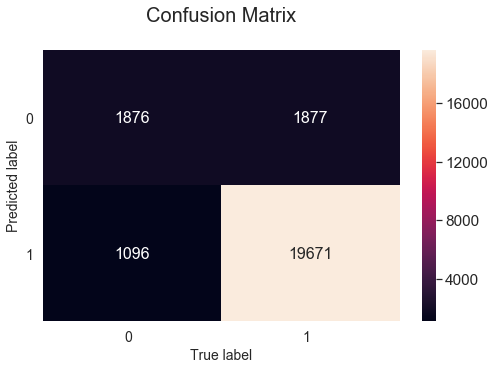

In [286]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.501


Text(0.5, 1.0, 'Confusion Matrix\n')

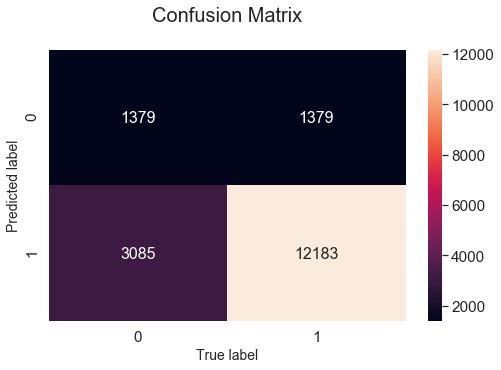

In [287]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [305]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j)
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [306]:
print(len(z1))
print(z2)

25
[0.6305689658163232, 0.6718615894046116, 0.6603273088750736, 0.6769594948822302, 0.6561923883472317, 0.6534953558924463, 0.6658017590557207, 0.6782532243251396, 0.6868073350686498, 0.6814437956014452, 0.6634422050018358, 0.6587667889933013, 0.680255808989273, 0.6858342552803955, 0.6888795476163172, 0.66935426281659, 0.6729243060581559, 0.6783756152069225, 0.6961683342022764, 0.6838714476528416, 0.6606043868939604, 0.6675445281156912, 0.6817360279243951, 0.6863884835962488, 0.6887612645387358]


In [178]:
x1 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]
# z1 = [0.933,0.958,0.956,0.973,0.974,0.993,0.998,0.996,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999,]

x2 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,]
# z2 = [0.673,0.682,0.681,0.691,0.692,0.651,0.682,0.667,0.685,0.695,0.642,0.67,0.672,0.681,0.687,0.64,0.659,0.67,0.670,0.677]

In [307]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [288]:
# Please write all the code with proper documentation
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)

100%|██████████████████████████████████| 24520/24520 [00:13<00:00, 1851.22it/s]


train  vector
24520
300


100%|██████████████████████████████████| 18026/18026 [00:11<00:00, 1611.56it/s]


Test vec
18026
300


100%|██████████████████████████████████| 12078/12078 [00:07<00:00, 1663.68it/s]


CV vec
12078
300


In [289]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)

In [290]:
print(train_w2v_vectors_essays.shape)

(24520, 300)


In [291]:
# average Word2Vec
# compute average word2vec for each title.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:00<00:00, 37524.98it/s]


train  vector
24520
300


100%|█████████████████████████████████| 18026/18026 [00:00<00:00, 32752.90it/s]


Test vec
18026
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 33342.46it/s]


CV vec
12078
300


In [292]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

In [293]:
# print(type(train_w2v_vectors_titles))
# print(type(train_w2v_vectors_essays))
# print(train_w2v_vectors_titles.shape)
# print(train_w2v_vectors_essays.shape)
# print(train_w2v_vectors_titles.ndim)
print(train_school_state_feature_responseCoding.ndim)

2


In [294]:
# from numpy import hstack
# print(type(train_school_state_feature_responseCoding[1]))
# print(train_school_state_feature_responseCoding.shape)
# print(train_school_state_feature_responseCoding.ndim)
# X_a = hstack((train_school_state_feature_responseCoding))
# print(X_a.shape)

In [295]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from  numpy import hstack
X_tr = hstack((train_w2v_vectors_essays,train_w2v_vectors_titles,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std))
X_cr = hstack((cv_w2v_vectors_essays,cv_w2v_vectors_titles,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std))
X_te = hstack((test_w2v_vectors_essays,test_w2v_vectors_titles,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 613) (24520,)
(12078, 613) (12078,)
(18026, 613) (18026,)


In [188]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

RFC = RandomForestClassifier(class_weight="balanced")
tuned_parameters = {'n_estimators': base_learners,'max_depth':depth}
clf = GridSearchCV(RFC, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Wall time: 38min 49s


In [152]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,4,6,8,10]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [153]:
# def auc_scorer(target_score, prediction):
#     auc_value = roc_auc_score(prediction, target_score)    
#     return auc_value

# scorer = make_scorer(auc_scorer, greater_is_better=True)

In [296]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [297]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

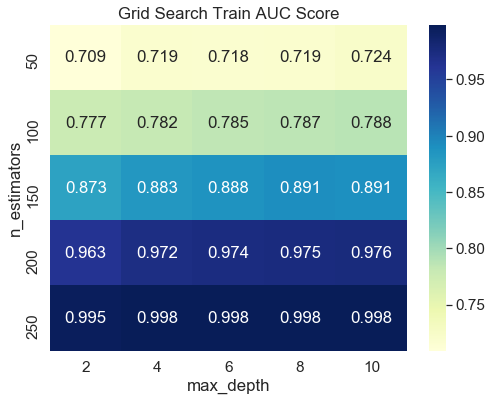

In [298]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [299]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

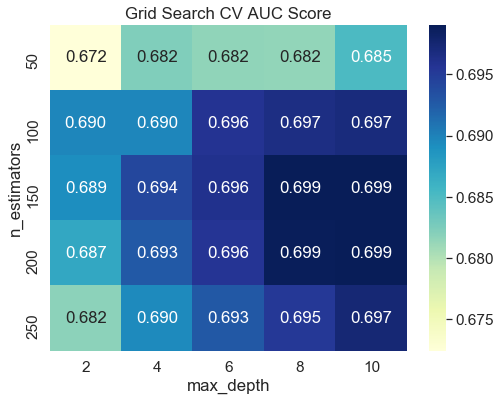

In [301]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

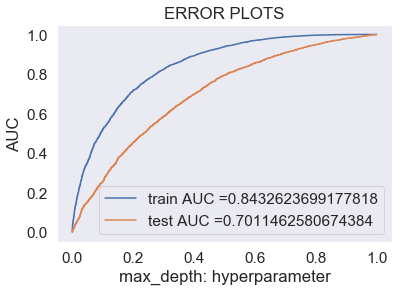

In [315]:
# print(train_auc.shape)
# %%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

rfc = RandomForestClassifier(n_estimators=250,max_depth=6,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
rfc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rfc, X_tr)    
y_test_pred = batch_predict(rfc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.24999998225063258 for threshold 0.49


Text(0.5, 1.0, 'Confusion Matrix\n')

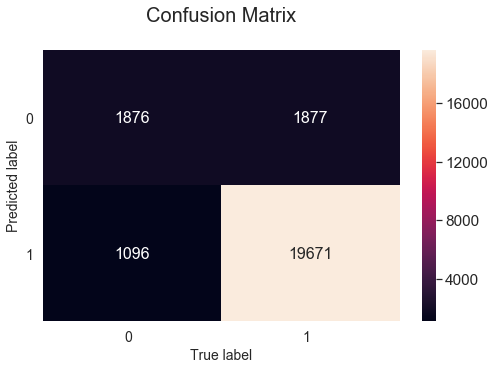

In [302]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.501


Text(0.5, 1.0, 'Confusion Matrix\n')

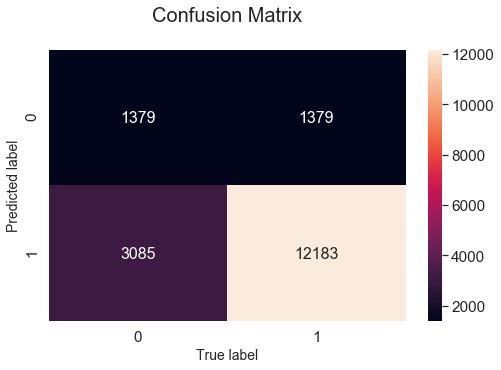

In [303]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [318]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j,class_weight="balanced")
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [198]:
print(len(z1))

25


In [194]:
x1 = [21,21,21,21,21,41,41,41,41,41,61,61,61,61,61,81,81,81,81,81]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

x2 = [21,21,21,21,21,41,41,41,41,41,61,61,61,61,61,81,81,81,81,81]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

In [319]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),),width=900)

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [304]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████| 24520/24520 [01:47<00:00, 228.99it/s]


Train matrix:
24520
300


100%|███████████████████████████████████| 12078/12078 [00:53<00:00, 226.28it/s]


CV matrix:
12078
300


100%|███████████████████████████████████| 18026/18026 [01:20<00:00, 223.89it/s]


Test matrix:
18026
300


In [162]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

In [163]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:01<00:00, 16762.09it/s]


Train matrix:
24520
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 16717.42it/s]


CV matrix:
12078
300


100%|█████████████████████████████████| 18026/18026 [00:01<00:00, 17388.08it/s]


Test matrix:
18026
300


In [164]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

In [165]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from  numpy import hstack
X_tr = hstack((train_tfidf_w2v_essays,train_tfidf_w2v_titles,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std))
X_cr = hstack((cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std))
X_te = hstack((test_tfidf_w2v_essays,test_tfidf_w2v_titles,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 613) (24520,)
(12078, 613) (12078,)
(18026, 613) (18026,)


In [213]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

RFC = RandomForestClassifier(class_weight="balanced")
tuned_parameters = {'n_estimators': base_learners,'max_depth':depth}
clf = GridSearchCV(RFC, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Wall time: 39min 44s


In [166]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,4,6,8,10]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [167]:
def auc_scorer(target_score, prediction):
    auc_value = roc_auc_score(prediction, target_score)    
    return auc_value

scorer = make_scorer(auc_scorer, greater_is_better=True)

In [168]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scorer)
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(auc_scorer), verbose=0)

In [169]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

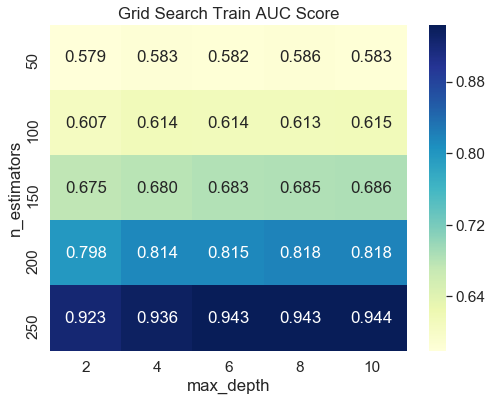

In [170]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [171]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

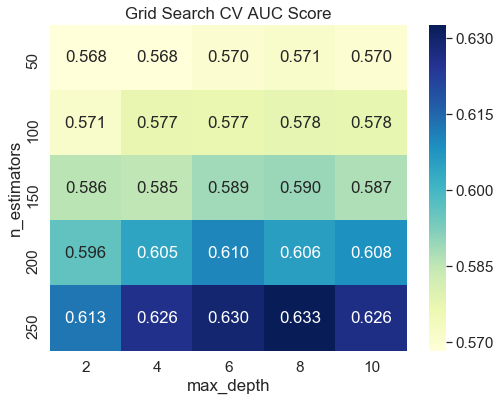

In [172]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

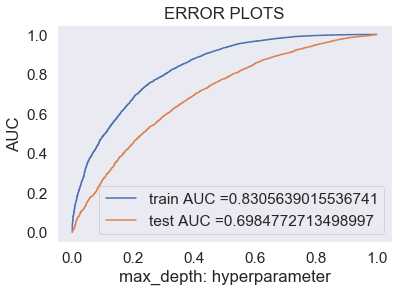

In [173]:
# print(train_auc.shape)
# %%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

rfc = RandomForestClassifier(n_estimators=200,max_depth=6,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
rfc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rfc, X_tr)    
y_test_pred = batch_predict(rfc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.812


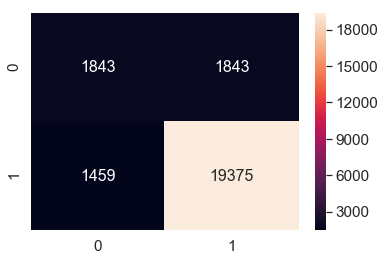

In [216]:
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.831


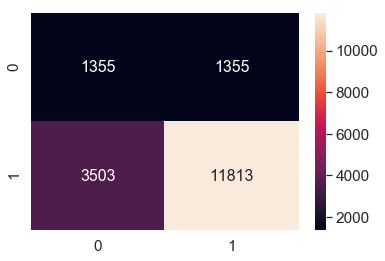

In [217]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [218]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,4,6,8,10]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j)
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [219]:
x1 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

x2 = [2,2,2,2,2,4,4,4,4,4,6,6,6,6,6,8,8,8,8,8,10,10,10,10,10]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

In [220]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

### Defining functions to be used by all the modules later

In [174]:
def plot_roc(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(15,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [175]:
def top_features(trained_clf, vect_object):   
    print("Word Cloud Showing the top 50 most important features.")    
    '''Get the most important features for the given input vector.'''
    features = trained_clf.feature_importances_
    top_features_index = (-features).argsort()               #Note : Putting a - sign indicates the indexes will be sorted in descending order.
    top_feat = np.take(vect_object.get_feature_names(), top_features_index[:50])
    corpus = " "
    for i in top_feat:
        corpus = corpus + " " + i
    wordcloud = WordCloud(background_color='black',
                          width=800, 
                          height=450)
    wordcloud.generate(corpus)
    fig = plt.figure(1, figsize=(15, 15), facecolor='k')
    plt.axis('off')
    plt.imshow(wordcloud, aspect='equal')
    plt.tight_layout(pad=0)
    plt.show()

In [176]:
# #Fit this model with the best value of hyperparameter obtained.
def performance(best_clf, vectorizationType, X_train_vec, y_train, X_test_vec, y_test, X_calib_vec, y_calib, max_depth, n_estimators): #optimal_hp should have 2 hyperparameters.
#     '''This function is used to measure the various performance metrics of the model. The model is build using the best value
#     of hyperparameters, obtained using grid and random search time series based cross validation. '''
    
    print("===========================================================")
    
 
##This function is used to visualize the results in a 2D plot.    
def plot_auc_2d(param1_val, param2_val, mean_auc_train, mean_auc_cv, results, param_names):
    
    #Sort the AUC scores according to the parameter n_estimators and plot AUC vs n_estimators
    param1_val = [results['params'][i][param_names[0]] for i in range(0,len(results['params']))] #n_estimators
    mean_auc_train_sorted = [i for _,i in sorted(zip(param1_val,mean_auc_train))]
    mean_auc_cv_sorted = [i for _,i in sorted(zip(param1_val,mean_auc_cv))]
    param1_val = sorted(param1_val)
    
    labels=["Train AUC","Test AUC"]
    y_axes = [mean_auc_train_sorted, mean_auc_cv_sorted]
    
    color_map = ['red','green']
    plt.figure(figsize=(10,6))
    for index in range(0,len(labels)):
        plt.plot(param1_val, y_axes[index], color=color_map[index], label=labels[index])
    plt.xlabel('Number of estimators (n_estimators)')
    plt.ylabel('AUC Scores')
    plt.title("Comparison between Train and Cross Validate AUC scores with n_estimators.")
    plt.legend()
    plt.show()
    
    #Sort the AUC scores according to the parameter max_depth and plot AUC vs max_depth
    param2_val = [results['params'][i][param_names[1]] for i in range(0,len(results['params']))] #max_depth
    mean_auc_train_sorted = [i for _,i in sorted(zip(param2_val,mean_auc_train))]
    mean_auc_cv_sorted = [i for _,i in sorted(zip(param2_val,mean_auc_cv))]
    param2_val = sorted(param2_val)
    
    labels=["Train AUC","Test AUC"]
    y_axes = [mean_auc_train_sorted, mean_auc_cv_sorted]
    
    color_map = ['red','green']
    plt.figure(figsize=(10,6))
    for index in range(0,len(labels)):
        plt.plot(param2_val, y_axes[index], color=color_map[index], label=labels[index])
    plt.xlabel('Max Depths (max_depth)')
    plt.ylabel('AUC Scores')
    plt.title("Comparison between Train and Cross Validate AUC scores with max_depth.")
    plt.legend()
    plt.show()
    
    
#Utility function to report best scores, https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    
#This function is used to obtain the grid values and call other functions to visualize the result of Grid Search.
def plot_results(rsearch_cv):
    '''This function is used to plot the curve for mean squared errors vs alpha values and obtain the optimal 
    value of the hyperparameters'''

    results = rsearch_cv.cv_results_

    #Get the Hyperparameter names in a dictionary
    param_names = []
    for i in results["params"][0].keys():
        param_names.append(str(i))

    param1_val = [results['params'][i][param_names[0]] for i in range(0,len(results['params']))] #max_depth
    param2_val = [results['params'][i][param_names[1]] for i in range(0,len(results['params']))] #min_sample_split

    mean_auc_train =  results['mean_train_score']
    mean_auc_cv =  results['mean_test_score']

    #Get the index position corresponding to the highest AUC score and use it to find the values of best hyperparameters
    index = list(mean_auc_cv).index(max(list(mean_auc_cv)))
    best_param1 = param1_val[index] #n_estimators
    best_param2 = param2_val[index] #max_depth

    print("\nThe best value of hyperparameters are: \n{} = {} \n{} = {}".format(param_names[0],best_param1,param_names[1],best_param2))

    #Compare Train and Test AUC in a 2D graph to determine overfitting and underfitting
    plot_auc_2d(param1_val, param2_val, mean_auc_train, mean_auc_cv, results, param_names)

In [177]:
from xgboost import XGBClassifier
def get_XGBDT_RandSearchCV(vectorizationType, X_train, y_train, X_test, y_test):
    '''This function will determine the best hyperparameters using TimeSeriesSplit CV and RandomSearchCV, using 10 fold cross validation. '''
    from sklearn.model_selection import TimeSeriesSplit
    tuned_parameters = {'max_depth': [2,3,4,5], 
                         'n_estimators' : [50,100,150,200,250]}
#     cv_timeSeries = TimeSeriesSplit(n_splits=5).split(X_train)
    base_estimator = XGBClassifier(learning_rate=0.01, objective='binary:logistic', random_state=0,class_weight="balanced")  
    
    #Run randomized search
    n_iter_search = 30
    rsearch_cv = RandomizedSearchCV(base_estimator,
                                    random_state=0,
                                    param_distributions=tuned_parameters, 
                                    n_iter=n_iter_search, 
#                                     cv=cv_timeSeries, 
                                    scoring='roc_auc', 
                                    n_jobs=-1)
    rsearch_cv.fit(X_train,y_train)
    print("Best estimator obtained from CV data: \n", rsearch_cv.best_estimator_)
    print("Best Score : ", rsearch_cv.best_score_)
    plot_results(rsearch_cv)
    return (rsearch_cv)

In [178]:
from datetime import datetime as dt
def XGBOOST_CLF(X_train_vectors, y_train, X_test_vectors, y_test, X_calib_vectors, y_calib, vectorizationType):
    '''This  function will determine the best estimators for each model and use them to call several other functions
    which trains the model and measure the performance of the model and plot the final results etc.'''

    print("\nUSING RandomSearchCV TO DETERMINE THE HYPERPARAMETERS. ")
    print("*****************************************************")
    
    st_t = dt.now()
    rsearch_cv = get_XGBDT_RandSearchCV(vectorizationType, X_train_vectors, y_train, X_test_vectors, y_test)
    print("Time taken to complete Hyperparameter Search : ",dt.now()-st_t)
    print("\nScore Reports with Ranks and STD\n")
    report(rsearch_cv.cv_results_)
    best_estimator = rsearch_cv.best_estimator_
    max_depth = rsearch_cv.best_estimator_.max_depth
    n_estimators = rsearch_cv.best_estimator_.n_estimators
    trained_clf = performance(best_estimator, vectorizationType, X_train_vectors, y_train, X_test_vectors, y_test, X_calib_vectors, y_calib, max_depth, n_estimators)
    return (trained_clf)

In [179]:
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 70420) (24520,)
(12078, 70420) (12078,)
(18026, 70420) (18026,)


In [180]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1761) (24520,)
(12078, 1761) (12078,)
(18026, 1761) (18026,)


In [181]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 5000) (24520,)
(12078, 5000) (12078,)
(18026, 5000) (18026,)


In [182]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_summary_bow,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 77194) (24520,)
(12078, 77194) (12078,)
(18026, 77194) (18026,)



USING RandomSearchCV TO DETERMINE THE HYPERPARAMETERS. 
*****************************************************
Best estimator obtained from CV data: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score :  0.7082860969547083

The best value of hyperparameters are: 
n_estimators = 250 
max_depth = 5


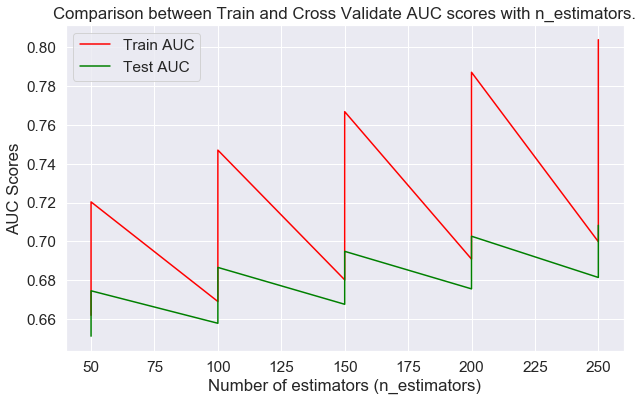

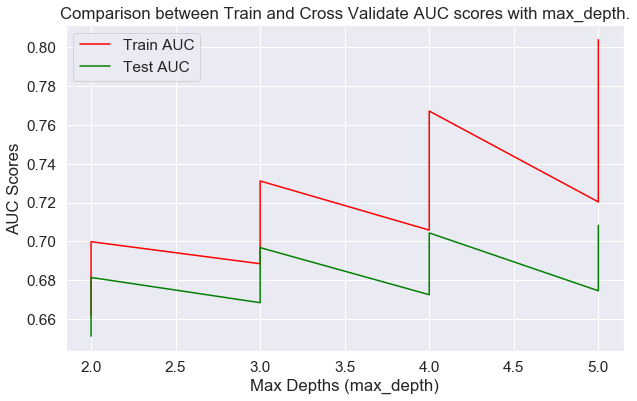

Time taken to complete Hyperparameter Search :  0:51:40.944536

Score Reports with Ranks and STD

Model with rank: 1
Mean validation score: 0.708 (std: 0.007)
Parameters: {'n_estimators': 250, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.704 (std: 0.006)
Parameters: {'n_estimators': 250, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.703 (std: 0.006)
Parameters: {'n_estimators': 200, 'max_depth': 5}



In [239]:
# from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
trained_clf_5 = XGBOOST_CLF(X_tr, y_train, X_te, y_test, X_cr, y_cv, "XGBoost-BOW")

In [190]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = XGBClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,3,4,5]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [191]:
# def auc_scorer(target_score, prediction):
#     try:
#         auc_value = roc_auc_score(prediction, target_score)   
#     except ValueError:
#         pass
#     return auc_value

# scorer = make_scorer(auc_scorer, greater_is_better=True)

In [193]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [194]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

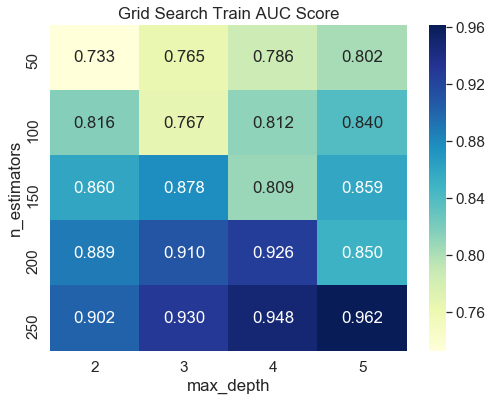

In [195]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,3,4,5]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [196]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

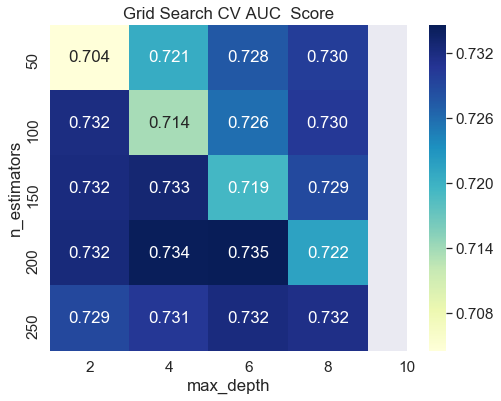

In [197]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC  Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

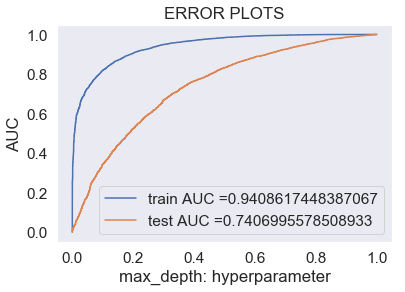

Wall time: 4min 8s


In [240]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=clf = XGBClassifier(n_estimators=250,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2499999822506326 for threshold 0.809


Text(0.5, 1.0, 'Confusion Matrix\n')

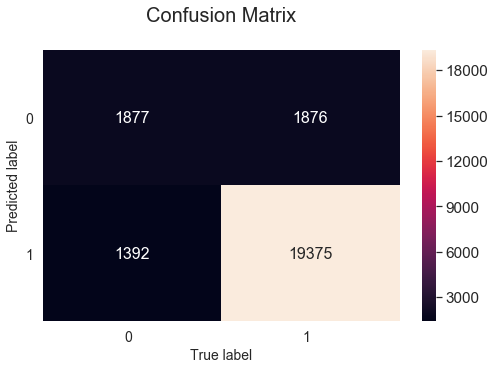

In [198]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.828


Text(0.5, 17.5, 'True label')

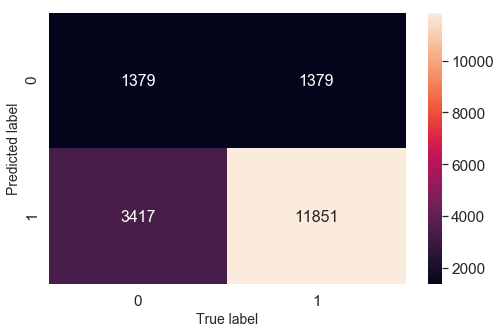

In [199]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)

In [244]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,3,4,5]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j,class_weight="balanced")
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [245]:
x1 = [2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

x2 = [2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

In [246]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [200]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(24520, 54681)
(12078, 54681)
(18026, 54681)


In [201]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (24520, 1761)
CV shape: (12078, 1761)
Test shape: (18026, 1761)


In [202]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_summary_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_summary_tfidf = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_summary_tfidf = vectorizer.transform(X_test['project_resource_summary'].values)
print("Train shape:",X_train_project_summary_tfidf.shape)
print("CV shape:",X_cv_project_summary_tfidf.shape)
print("Test shape:",X_test_project_summary_tfidf.shape)

Train shape: (24520, 1761)
CV shape: (12078, 1761)
Test shape: (18026, 1761)


In [203]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_project_summary_tfidf,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_project_summary_tfidf,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_project_summary_tfidf,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 58216) (24520,)
(12078, 58216) (12078,)
(18026, 58216) (18026,)



USING RandomSearchCV TO DETERMINE THE HYPERPARAMETERS. 
*****************************************************
Best estimator obtained from CV data: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score :  0.7089957837691073

The best value of hyperparameters are: 
n_estimators = 250 
max_depth = 5


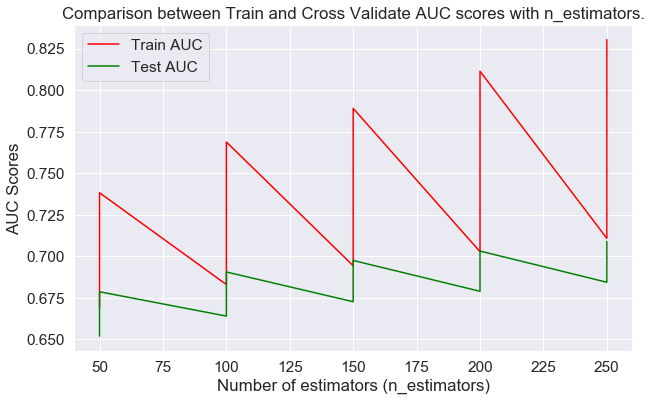

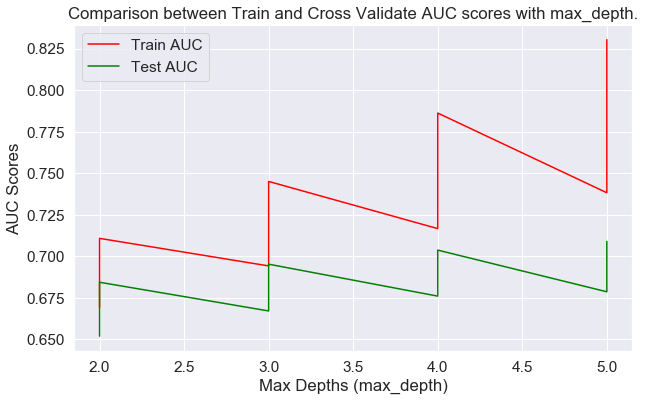

Time taken to complete Hyperparameter Search :  1:33:44.764945

Score Reports with Ranks and STD

Model with rank: 1
Mean validation score: 0.709 (std: 0.004)
Parameters: {'n_estimators': 250, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.704 (std: 0.003)
Parameters: {'n_estimators': 250, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.703 (std: 0.004)
Parameters: {'n_estimators': 200, 'max_depth': 5}



In [251]:
# from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
trained_clf_5 = XGBOOST_CLF(X_tr, y_train, X_te, y_test, X_cr, y_cv, "XGBoost-TFIDF")

In [204]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = XGBClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,3,4,5]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [205]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [206]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

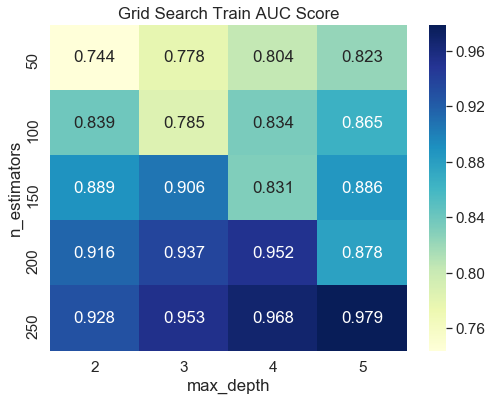

In [207]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,3,4,5]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [208]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

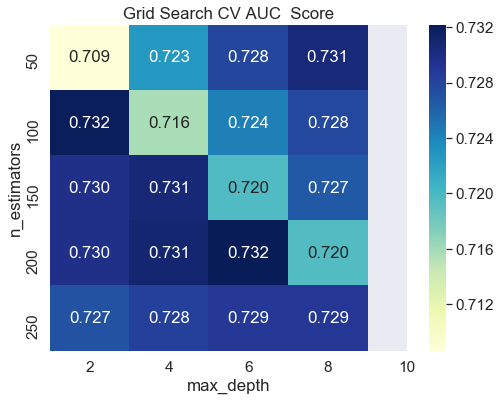

In [209]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC  Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

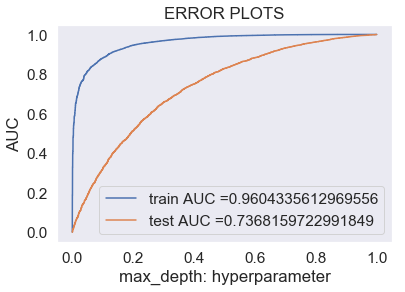

Wall time: 8min 18s


In [252]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=clf = XGBClassifier(n_estimators=250,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2499999822506326 for threshold 0.809


Text(0.5, 1.0, 'Confusion Matrix\n')

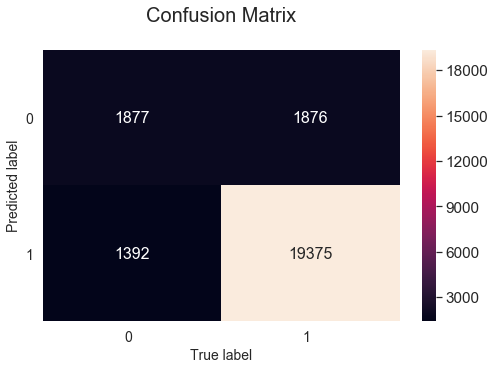

In [210]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.828


Text(0.5, 1.0, 'Confusion Matrix\n')

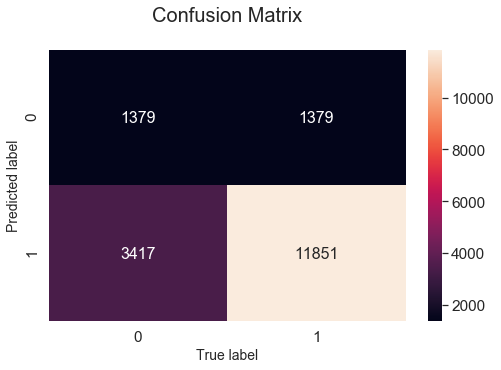

In [211]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [255]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,3,4,5]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j,class_weight="balanced")
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [256]:
x1 = [2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
y1 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

x2 = [2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
y2 = [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250,50,100,150,200,250]

In [257]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [212]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)

100%|██████████████████████████████████| 24520/24520 [00:18<00:00, 1358.78it/s]


train  vector
24520
300


100%|██████████████████████████████████| 18026/18026 [00:09<00:00, 1978.93it/s]


Test vec
18026
300


100%|██████████████████████████████████| 12078/12078 [00:06<00:00, 1778.30it/s]


CV vec
12078
300


In [213]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)

In [214]:
# average Word2Vec
# compute average word2vec for each title.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:01<00:00, 16178.49it/s]


train  vector
24520
300


100%|█████████████████████████████████| 18026/18026 [00:00<00:00, 28104.12it/s]


Test vec
18026
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 30326.64it/s]


CV vec
12078
300


In [215]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

In [216]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from  numpy import hstack
X_tr = hstack((train_w2v_vectors_essays,train_w2v_vectors_titles,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std))
X_cr = hstack((cv_w2v_vectors_essays,cv_w2v_vectors_titles,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std))
X_te = hstack((test_w2v_vectors_essays,test_w2v_vectors_titles,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 613) (24520,)
(12078, 613) (12078,)
(18026, 613) (18026,)



USING RandomSearchCV TO DETERMINE THE HYPERPARAMETERS. 
*****************************************************
Best estimator obtained from CV data: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score :  0.7049202726922968

The best value of hyperparameters are: 
n_estimators = 250 
max_depth = 5


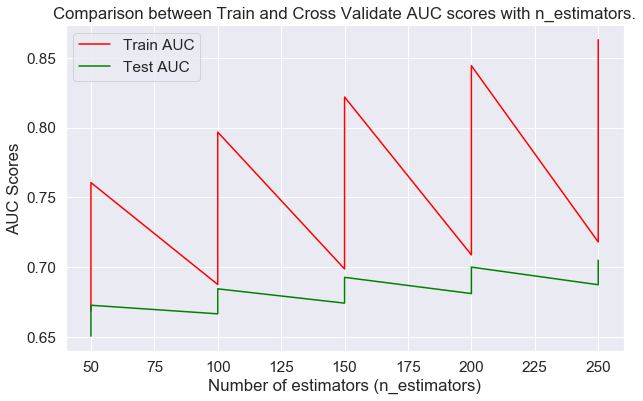

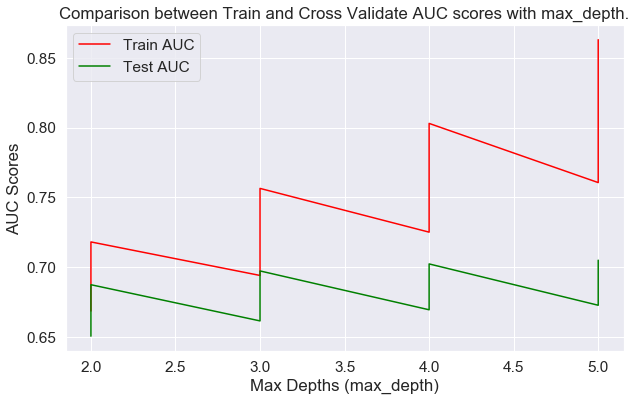

Time taken to complete Hyperparameter Search :  2:14:16.746942

Score Reports with Ranks and STD

Model with rank: 1
Mean validation score: 0.705 (std: 0.012)
Parameters: {'n_estimators': 250, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.702 (std: 0.011)
Parameters: {'n_estimators': 250, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.700 (std: 0.012)
Parameters: {'n_estimators': 200, 'max_depth': 5}



In [263]:
# from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
trained_clf_5 = XGBOOST_CLF(X_tr, y_train, X_te, y_test, X_cr, y_cv, "AVG W2V")

In [217]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = XGBClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,3,4,5]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [218]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [219]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

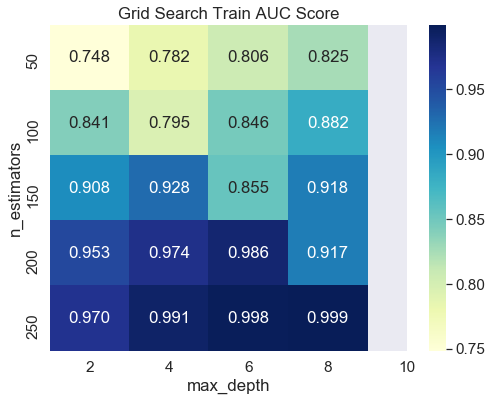

In [220]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [221]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

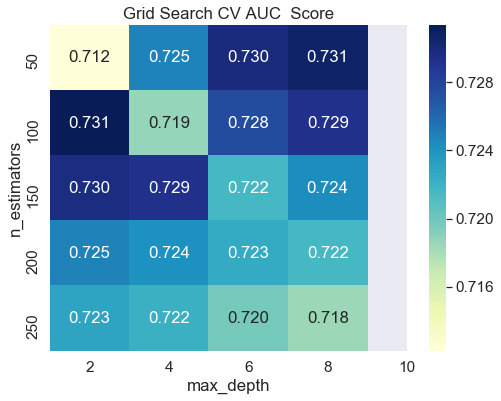

In [222]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC  Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

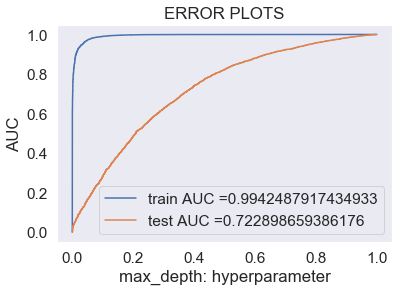

Wall time: 11min 53s


In [264]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=clf = XGBClassifier(n_estimators=250,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2499999822506326 for threshold 0.809


Text(0.5, 1.0, 'Confusion Matrix\n')

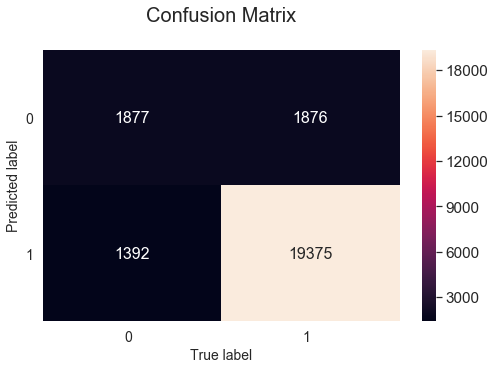

In [223]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.828


Text(0.5, 1.0, 'Confusion Matrix\n')

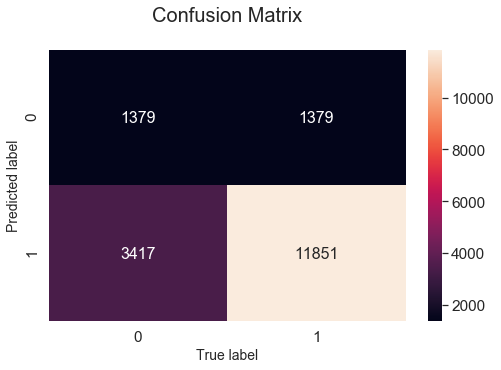

In [224]:

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [267]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,3,4,5]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j)
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [268]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation


In [232]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████| 24520/24520 [02:20<00:00, 174.04it/s]


Train matrix:
24520
300


100%|███████████████████████████████████| 12078/12078 [00:50<00:00, 243.98it/s]


CV matrix:
12078
300


100%|███████████████████████████████████| 18026/18026 [01:13<00:00, 243.88it/s]


Test matrix:
18026
300


In [233]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

In [234]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:01<00:00, 14040.08it/s]


Train matrix:
24520
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 12430.49it/s]


CV matrix:
12078
300


100%|█████████████████████████████████| 18026/18026 [00:01<00:00, 15201.72it/s]


Test matrix:
18026
300


In [235]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

In [236]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from  numpy import hstack
X_tr = hstack((train_tfidf_w2v_essays,train_tfidf_w2v_titles,train_school_state_feature_responseCoding,train_project_grade_category_feature_responseCoding,train_teacher_prefix_feature_responseCoding,train_clean_categories_feature_responseCoding,train_clean_subcategories_feature_responseCoding,X_train_price_std,X_train_projects_std,X_train_qty_std))
X_cr = hstack((cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,cv_school_state_feature_responseCoding,cv_project_grade_category_feature_feature_responseCoding,cv_teacher_prefix_feature_responseCoding,cv_clean_categories_feature_responseCoding,cv_clean_subcategories_feature_responseCoding, X_cv_price_std,X_cv_projects_std,X_cv_qty_std))
X_te = hstack((test_tfidf_w2v_essays,test_tfidf_w2v_titles,test_project_grade_category_feature_responseCoding,test_school_state_feature_responseCoding,test_teacher_prefix_feature_responseCoding,test_clean_categories_feature_responseCoding,test_clean_subcategories_feature_responseCoding, X_test_price_std,X_test_projects_std,X_test_qty_std))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 613) (24520,)
(12078, 613) (12078,)
(18026, 613) (18026,)



USING RandomSearchCV TO DETERMINE THE HYPERPARAMETERS. 
*****************************************************
Best estimator obtained from CV data: 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score :  0.7110558553725895

The best value of hyperparameters are: 
n_estimators = 250 
max_depth = 5


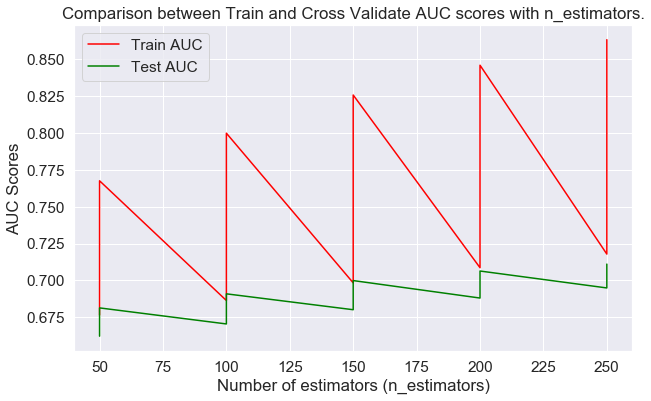

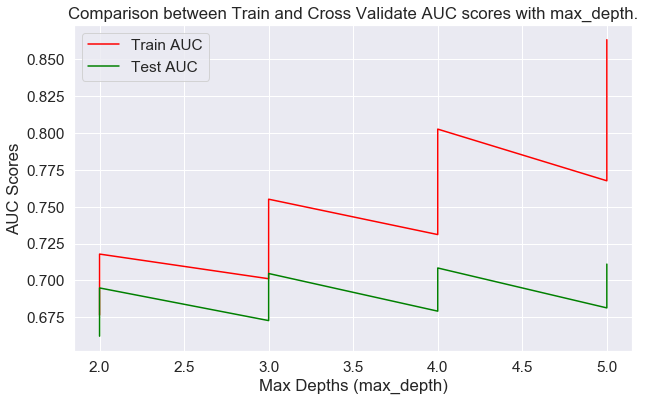

Time taken to complete Hyperparameter Search :  2:09:34.703986

Score Reports with Ranks and STD

Model with rank: 1
Mean validation score: 0.711 (std: 0.010)
Parameters: {'n_estimators': 250, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.708 (std: 0.010)
Parameters: {'n_estimators': 250, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.706 (std: 0.010)
Parameters: {'n_estimators': 200, 'max_depth': 5}



In [275]:
# from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
trained_clf_5 = XGBOOST_CLF(X_tr, y_train, X_te, y_test, X_cr, y_cv, "TFIDF W2V")

In [237]:
# print(clf.best_estimator_)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

learner = XGBClassifier(class_weight="balanced")
n_estimators =[50,100,150,200,250]
depth = [2,3,4,5]
parameters = {'n_estimators': n_estimators, 'max_depth':depth}

In [238]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
grid_obj = GridSearchCV(learner, parameters, scoring='roc_auc')
grid_obj.fit(X_tr,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [239]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_train_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

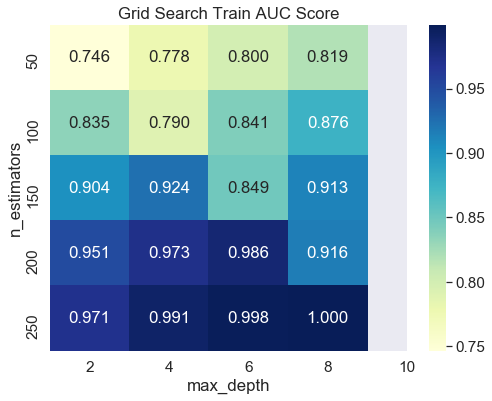

In [240]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search Train AUC Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

In [241]:
# grid_obj = GridSearchCV(learner, parameters,  scorer)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(depth))

Text(0.5, 26.5, 'max_depth')

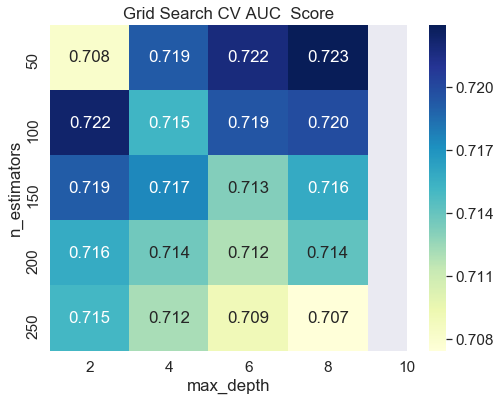

In [242]:
# import pandas as pd
# pvt = pd.pivot_table(pd.DataFrame(data=scores,index="depth",columns="n_estimators"))
plt.figure(figsize=(8, 6))
labels_x=[2,4,6,8,10]
labels_y=[50,100,150,200,250]
plt.title('Grid Search CV AUC  Score')

heatmap=sns.heatmap(scores, annot=True, cmap="YlGnBu", fmt=".3f",xticklabels=labels_x, yticklabels=labels_y)
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
# heatmap.yaxis.set_ticklabels(len(n_estimators), rotation=0, ha='right', fontsize=14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

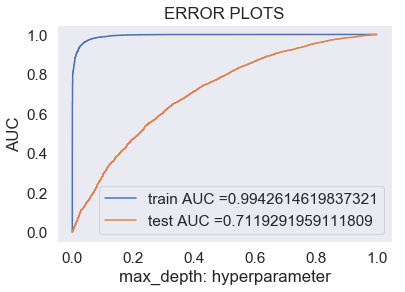

Wall time: 11min 16s


In [276]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=clf = XGBClassifier(n_estimators=250,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.2499999822506326 for threshold 0.809


Text(0.5, 1.0, 'Confusion Matrix\n')

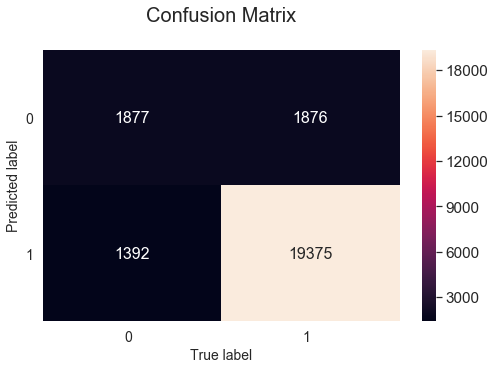

In [243]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
sns.set(font_scale=1.4)#for label size
heatmap=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.828


Text(0.5, 1.0, 'Confusion Matrix\n')

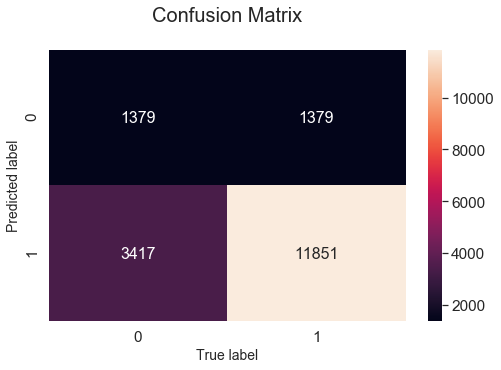

In [244]:

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
fig = plt.figure(figsize=(8,5))
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.ylabel('Predicted label',size=14)
plt.xlabel('True label',size=14)
plt.title("Confusion Matrix\n",size=20)

In [279]:
z1=[]
z2=[]
base_learners = [50,100,150,200,250]
depth = [2,3,4,5]

for i in depth:
    for j in base_learners:
        rfc = RandomForestClassifier(max_depth=i,n_estimators=j)
        rfc.fit(X_tr, y_train)
        y_train_pred = batch_predict(rfc, X_tr)    
        y_test_pred = batch_predict(rfc, X_te)
        
        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
        
        train_AUC =auc(train_fpr, train_tpr)
        test_AUC =auc(test_fpr, test_tpr)
        
        z1.append(train_AUC)
        z2.append(test_AUC)


In [280]:
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='n_estimators'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

<h1>3. Conclusion</h1>

In [305]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Max Depth","N-Estimators", "AUC"]

x.add_row(["Random Forest-BOW", "BRUTE", 10,250, 0.69])
x.add_row(["Random Forest-andom Forest-Avg TFIDF", "BRUTE", 6,250,0.71 ])
x.add_row(["Random Forest-Avg W2V", "BRUTE", 6,250, 0.70])
x.add_row(["Random Forest-TFIDFW2V", "BRUTE", 6,200, 0.70])
x.add_row(["XGBoost-BOW", "BRUTE", 5,250, 0.74])
x.add_row(["XGBoost-TFIDF", "BRUTE", 5,250, 0.73])
x.add_row(["XGBoost-AVG W2V", "BRUTE", 5,250, 0.72])
x.add_row(["XGBoost-TFIDFW2V", "BRUTE", 5, 250 , 0.71])


print(x)

+--------------------------------------+-------+-----------+--------------+------+
|              Vectorizer              | Model | Max Depth | N-Estimators | AUC  |
+--------------------------------------+-------+-----------+--------------+------+
|          Random Forest-BOW           | BRUTE |     10    |     250      | 0.69 |
| Random Forest-andom Forest-Avg TFIDF | BRUTE |     6     |     250      | 0.71 |
|        Random Forest-Avg W2V         | BRUTE |     6     |     250      | 0.7  |
|        Random Forest-TFIDFW2V        | BRUTE |     6     |     200      | 0.7  |
|             XGBoost-BOW              | BRUTE |     5     |     250      | 0.74 |
|            XGBoost-TFIDF             | BRUTE |     5     |     250      | 0.73 |
|           XGBoost-AVG W2V            | BRUTE |     5     |     250      | 0.72 |
|           XGBoost-TFIDFW2V           | BRUTE |     5     |     250      | 0.71 |
+--------------------------------------+-------+-----------+--------------+------+
